In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('insurance.csv')

In [2]:
from sklearn.preprocessing import StandardScaler

In [13]:
x = pd.get_dummies(df, drop_first=True)

In [14]:
x = x.drop('charges', axis='columns')

In [15]:
x

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,False,True,False,False,True
1,18,33.770,1,True,False,False,True,False
2,28,33.000,3,True,False,False,True,False
3,33,22.705,0,True,False,True,False,False
4,32,28.880,0,True,False,True,False,False
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,True,False,True,False,False
1334,18,31.920,0,False,False,False,False,False
1335,18,36.850,0,False,False,False,True,False
1336,21,25.800,0,False,False,False,False,True


In [16]:
y = df['charges']

In [17]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [25]:
scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

In [26]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

In [27]:
models = {
    "Linear Regression" : LinearRegression(),
    'Ridge' : Ridge(),
    'Lasso' : Lasso(),
    'Elasticnet' : ElasticNet()
}

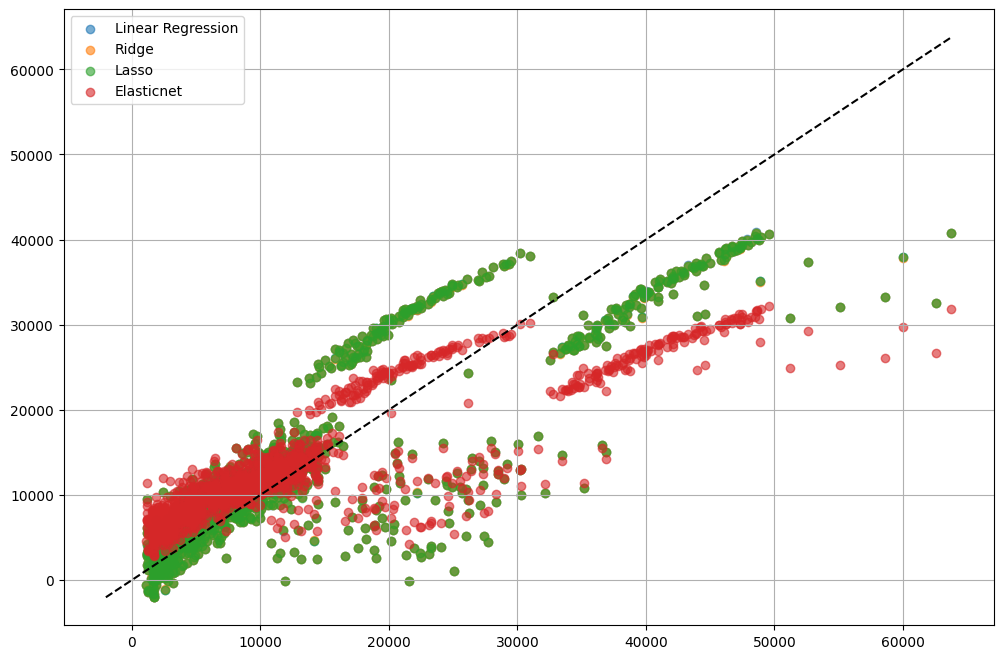

In [50]:
from sklearn.metrics import mean_squared_error
plt.figure(figsize=(12, 8))
result = {}
for name, model in models.items():
    model.fit(x_scaled, y)

    y_pred = model.predict(x_scaled)

    mse = mean_squared_error(y, y_pred)
    result[name] = {
        'name' : name,
        'mse' : mse
    }

    plt.scatter(y, y_pred, label=name, alpha=0.6)


minimum = min(min(y), min([min(model.predict(x_scaled)) for model in models.values()]))
maximum = max(max(y), max([max(model.predict(x_scaled)) for model in models.values()]))

plt.plot([minimum, maximum], [minimum, maximum], 'k--')
plt.grid(True)
plt.legend()

In [33]:
result

{'Linear Regression': {'name': 'Linear Regression', 'mse': 36501893.00741544},
 'Ridge': {'name': 'Ridge', 'mse': 36501956.619647},
 'Lasso': {'name': 'Lasso', 'mse': 36501908.6676196},
 'Elasticnet': {'name': 'Elasticnet', 'mse': 48817680.32306508}}